# Prerequisites

*   Install Web3
*   Infura Account

In [ ]:
!pip install web3


# Retrieving the Uniswap and Chainlink Prices for ETH/USD pair
*   Connect to Web three using your Infura Key
*   Get the token addresses for ETH and USDC
*   Connect to the chainlink pricefeed
*   Connect to uniswaps oracle for the ETH/USDC pool on mainnet
*   Running this block of code will get the current prices of 1 ETH in USD using Chainlink and Uniswap.



In [ ]:
import os
from web3 import Web3
import web3
# USE YOUR INFURA KEY
infura_url = 'https://mainnet.infura.io/v3/9df46fb3b08c4542b1ad71ec57b1b336'
w3 = Web3(Web3.HTTPProvider(infura_url))
tokenETH = '0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2'
tokenUSDC = '0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48'
checksum_ETH = Web3.to_checksum_address('0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2')
checksum_USDC = Web3.to_checksum_address('0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48')
chainlink_oracle = '0x5f4eC3Df9cbd43714FE2740f5E3616155c5b8419' #ETH/USD
chainlink_abi = '[{"inputs":[{"internalType":"address","name":"_aggregator","type":"address"},{"internalType":"address","name":"_accessController","type":"address"}],"stateMutability":"nonpayable","type":"constructor"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"int256","name":"current","type":"int256"},{"indexed":true,"internalType":"uint256","name":"roundId","type":"uint256"},{"indexed":false,"internalType":"uint256","name":"updatedAt","type":"uint256"}],"name":"AnswerUpdated","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"uint256","name":"roundId","type":"uint256"},{"indexed":true,"internalType":"address","name":"startedBy","type":"address"},{"indexed":false,"internalType":"uint256","name":"startedAt","type":"uint256"}],"name":"NewRound","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"from","type":"address"},{"indexed":true,"internalType":"address","name":"to","type":"address"}],"name":"OwnershipTransferRequested","type":"event"},{"anonymous":false,"inputs":[{"indexed":true,"internalType":"address","name":"from","type":"address"},{"indexed":true,"internalType":"address","name":"to","type":"address"}],"name":"OwnershipTransferred","type":"event"},{"inputs":[],"name":"acceptOwnership","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[],"name":"accessController","outputs":[{"internalType":"contract AccessControllerInterface","name":"","type":"address"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"aggregator","outputs":[{"internalType":"address","name":"","type":"address"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"_aggregator","type":"address"}],"name":"confirmAggregator","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[],"name":"decimals","outputs":[{"internalType":"uint8","name":"","type":"uint8"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"description","outputs":[{"internalType":"string","name":"","type":"string"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"uint256","name":"_roundId","type":"uint256"}],"name":"getAnswer","outputs":[{"internalType":"int256","name":"","type":"int256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"uint80","name":"_roundId","type":"uint80"}],"name":"getRoundData","outputs":[{"internalType":"uint80","name":"roundId","type":"uint80"},{"internalType":"int256","name":"answer","type":"int256"},{"internalType":"uint256","name":"startedAt","type":"uint256"},{"internalType":"uint256","name":"updatedAt","type":"uint256"},{"internalType":"uint80","name":"answeredInRound","type":"uint80"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"uint256","name":"_roundId","type":"uint256"}],"name":"getTimestamp","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"latestAnswer","outputs":[{"internalType":"int256","name":"","type":"int256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"latestRound","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"latestRoundData","outputs":[{"internalType":"uint80","name":"roundId","type":"uint80"},{"internalType":"int256","name":"answer","type":"int256"},{"internalType":"uint256","name":"startedAt","type":"uint256"},{"internalType":"uint256","name":"updatedAt","type":"uint256"},{"internalType":"uint80","name":"answeredInRound","type":"uint80"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"latestTimestamp","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"owner","outputs":[{"internalType":"address payable","name":"","type":"address"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"uint16","name":"","type":"uint16"}],"name":"phaseAggregators","outputs":[{"internalType":"contract AggregatorV2V3Interface","name":"","type":"address"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"phaseId","outputs":[{"internalType":"uint16","name":"","type":"uint16"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"_aggregator","type":"address"}],"name":"proposeAggregator","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[],"name":"proposedAggregator","outputs":[{"internalType":"contract AggregatorV2V3Interface","name":"","type":"address"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"uint80","name":"_roundId","type":"uint80"}],"name":"proposedGetRoundData","outputs":[{"internalType":"uint80","name":"roundId","type":"uint80"},{"internalType":"int256","name":"answer","type":"int256"},{"internalType":"uint256","name":"startedAt","type":"uint256"},{"internalType":"uint256","name":"updatedAt","type":"uint256"},{"internalType":"uint80","name":"answeredInRound","type":"uint80"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"proposedLatestRoundData","outputs":[{"internalType":"uint80","name":"roundId","type":"uint80"},{"internalType":"int256","name":"answer","type":"int256"},{"internalType":"uint256","name":"startedAt","type":"uint256"},{"internalType":"uint256","name":"updatedAt","type":"uint256"},{"internalType":"uint80","name":"answeredInRound","type":"uint80"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"_accessController","type":"address"}],"name":"setController","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"_to","type":"address"}],"name":"transferOwnership","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[],"name":"version","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"}]'
priceFeed = w3.eth.contract(address=chainlink_oracle, abi=chainlink_abi)

uniswap_oracle = '0x951A807b523cF6e178e0ab80fBd2C9B035521931'
uniswap_abi = '[{"inputs":[{"internalType":"address","name":"_factory","type":"address"}],"stateMutability":"nonpayable","type":"constructor"},{"anonymous":false,"inputs":[{"indexed":false,"internalType":"address","name":"token1","type":"address"},{"indexed":false,"internalType":"address","name":"token2","type":"address"}],"name":"PairAdded","type":"event"},{"inputs":[],"name":"PERIOD","outputs":[{"internalType":"uint256","name":"","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"_tokenIn","type":"address"},{"internalType":"uint256","name":"_amountIn","type":"uint256"},{"internalType":"address","name":"_tokenOut","type":"address"}],"name":"consult","outputs":[{"internalType":"uint256","name":"quoteAmount","type":"uint256"}],"stateMutability":"view","type":"function"},{"inputs":[],"name":"factory","outputs":[{"internalType":"address","name":"","type":"address"}],"stateMutability":"view","type":"function"},{"inputs":[{"internalType":"address","name":"_tokenIn","type":"address"},{"internalType":"address","name":"_tokenOut","type":"address"}],"name":"update","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"_tokenIn","type":"address"},{"internalType":"uint256","name":"_amountIn","type":"uint256"},{"internalType":"address","name":"_tokenOut","type":"address"}],"name":"updateAndConsult","outputs":[{"internalType":"uint256","name":"_amountOut","type":"uint256"}],"stateMutability":"nonpayable","type":"function"}]'
uniswap = w3.eth.contract(address=uniswap_oracle, abi=uniswap_abi)

def chainlink_getLatestPrice():
  (junk, price, junk2, lastUpdatedTime, junk3) = priceFeed.functions.latestRoundData().call()
  return price/(10**8);

def uniswap_getLatestPrice(amountInETH):
  amountOutUSD = uniswap.functions.consult(checksum_USDC, amountInETH,checksum_ETH).call()
  price = amountOutUSD/amountInETH
  return (10**12)/price
chainlink_price = chainlink_getLatestPrice()
uniswap_price = uniswap_getLatestPrice(2000)
print("Chainlink USD/ETH:", chainlink_price)
print("Uniswap USDC/ETH:",uniswap_price)


Chainlink USD/ETH: 1830.81918341
Uniswap USDC/ETH: 1832.8491888586357


# Compound Oracle Price


*   If chainlink's price is whithin a small delta of Uniswap's price return chainlink's price
*   Else return uniswap's price



In [ ]:
# Compound Oracle Part
DELTA = 0.0000004
def getCompoundPrice(delta):
  c_price = chainlink_getLatestPrice()
  u_price = uniswap_getLatestPrice(10)
  if c_price <= u_price + delta and c_price >= u_price - delta:
    return c_price, c_price, u_price
  else:
    return u_price, c_price, u_price
comp_price, chainlink_price, uniswap_price = getCompoundPrice(DELTA)
print("Compound Price:", comp_price)
print("Chainlink ETH/USDC:", chainlink_price)
print("Uniswap ETH/USDC:",uniswap_price)

Compound Price: 1832.8491891525775
Chainlink ETH/USDC: 1830.81918341
Uniswap ETH/USDC: 1832.8491891525775


# Experiement
We want to examine what happens to the chainlink's reported price, uniswap's reported price, and our compound price over time using different values for delta. First, we need to initialize the experiement.

In [ ]:
import time
x = []
comp_prices = []
c_prices = []
u_prices = []
step = 0

# Run Experiment

In [ ]:
while True:
    comp_price, chainlink_price, uniswap_price = getCompoundPrice(DELTA)
    comp_prices.append(comp_price)
    c_prices.append(chainlink_price)
    u_prices.append(uniswap_price)
    x.append(step)
    step += 1
    time.sleep(60)

# Plotting the Experiment
Here we can plot the results of our experiment with different delta's

<function matplotlib.pyplot.show(close=None, block=None)>

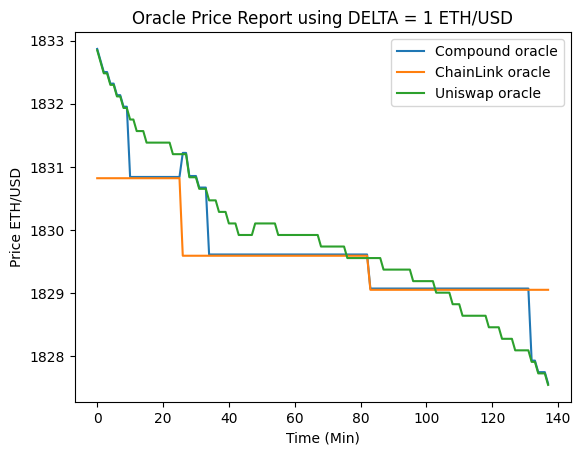

In [ ]:
import matplotlib.pyplot as plt

k = 0.02
# Change delta do adjust the experiment
delta = 1
comp_prices = []
for i in range(0, len(u_prices)):
  if c_prices[i] <= u_prices[i] + delta and c_prices[i] >= u_prices[i] - delta:
    comp_prices.append(c_prices[i] + k)
  else:
    comp_prices.append(u_prices[i] + k)

plt.plot(x, comp_prices, label = "Compound oracle")
plt.plot(x, c_prices, label = "ChainLink oracle")
plt.plot(x, u_prices, label = "Uniswap oracle")
plt.xlabel("Time (Min)")
plt.ylabel('Price ETH/USD')
plt.legend()
plt.title("Oracle Price Report using DELTA = " + str(delta) + ' ETH/USD')
plt.show